# Milestone 1 - Data and Questions

## Data

I will start by describing the dataset, which can be found at https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries. This dataset contains the salaries and other job-related variables of 607 employees in different companies from 2020 to 2022. Access to the data requires a Kaggle account. The author claims to have collected the aggregated data from https://salaries.ai-jobs.net/, but this link does not seem to work.

In [1]:
# tidyverse contains read_csv and some other basic functions
library(tidyverse)
# ggplot2 allows me to create and display visualizations
library(ggplot2)
# gridExtra allows me to place visualizations in a grid to diplay all at once
library(gridExtra)
# scales allows me to reformat axis tick labels, such as placing commas in large numbers
library(scales)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




My group (Group 40) has created a GitHub repository with the dataset inside it. This should allow the data to be read without downloading it.

In [2]:
data_url = "https://raw.githubusercontent.com/celike1/STAT301_Project/main/ds_salaries.csv"
salary_data <- read_csv(data_url)
head(salary_data)

New names:
• `` -> `...1`
Rows: 607 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): experience_level, employment_type, job_title, salary_currency, empl...
dbl (5): ...1, work_year, salary, salary_in_usd, remote_ratio

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


Reading the data allows us to see that there are 12 columns in the dataset. The dataset description from Kaggle gives more details on the values and what they mean, with the exception of `...1`. Opening the csv file with a text editor shows that `...1` does not actually have a column name, so `...1` must be a placeholder generated by `read_csv` to access the column. Seeing that it only consists of integers starting at 0 and going up by 1 for each row, it is likely meant to be an index column.

In [3]:
colnames(salary_data)

[1] "...1"               "work_year"          "experience_level"  
 [4] "employment_type"    "job_title"          "salary"            
 [7] "salary_currency"    "salary_in_usd"      "employee_residence"
[10] "remote_ratio"       "company_location"   "company_size"

I will now list out the other 11 columns and their meanings according to the Kaggle page:
- `work_year` is a numerical integer variable representing the year that a salary payment was made.
- `experience_level` is an ordinal categorical variable representing the experience level that the employee had. It can be `EN` for "Entry-level"/"Junior", `MI` for "Mid-level"/"Intermediate", `SE` for "Senior-level"/"Expert", or `EX` for "Executive-level"/"Director".
- `employment_type` is a categorical variable representing the type of employment that the employee had. It can be `PT` for "Part-time", `FT` for "Full-time", `CT` for "Contractor", or `FL` for "Freelance".
- `job_title` is a categorical variable representing the name of the employee's job.
- `salary` is a numerical integer variable representing the gross salary paid to the employee (gross means before deductions), in the currency displayed by `salary_currency`.
- `salary_currency` is a categorical variable representing the currency unit that `salary` was paid in.
- `salary_in_usd` is a numerical integer variable representing the gross salary paid to the employee (gross means before deductions), converted to the currency `USD`.
- `employee_residence` is a categorical variable representing the country that the employee was living in.
- `remote_ratio` is an ordinal categorical variable representing the amount of work that the employee did remotely. Despite being composed of integers, this is a categorical variable because they are estimates with large gaps in between. It can be `0` for less than 20% remotely (not remote), `50` for 20%-80% remotely (partially remote), or `100` for more than 80% remotely (fully remote)
- `company_location` is a categorical variable representing the country that the employer's main office or contracting branch was in.
- `company_size` is an ordinal categorical variable representing the average number of employees working in the company throughout the year. It can be `S` for less than 50, `M` for 50-250, or `L` for over 250.

In [4]:
dim(salary_data)

[1] 607  12

Using `dim()` shows that there are 607 observations, and confirms that there are 12 columns.

## Question

The question that I would like to answer using this dataset is, "What will the salary of data science jobs be in 2023 in various work experience levels?". This is a predictive data analysis question that can be answered with either `salary` or `salary_in_usd` as the response variable (likely `salary_in_usd` for the same units, assume currency conversion rates are constant), and both `work_year` and `experience_level` as explanatory variables. By finding a correlation between `work_year` and `salary_in_usd` using bootstrapping and some form of regression (likely linear), I can come up with a pattern that I could apply to `work_year = 2023` to predict the salary. I would need to separate the data by `experience_level` and make a different model for each one. Additionally, `remote_ratio` might be a multicollinear variable because COVID-19 would have influenced the salaries in certain years to differ due to job cuts and more remote work.

# Milestone 2 - Exploratory Data Analysis (EDA) and Visualizations

## Cleaning and Wrangling

The data is already tidy, so cleaning is not required. However, some data wrangling is necessary:
- Rename the `...1` column to `id`
- Change the data types of multiple categorical and ordinal variables from the `character` data type to the `factor` and `ordered` data types, respectively

In [5]:
salary_data = rename(salary_data, "id" = "...1")

Only the attributes with a low number of possible values should be changed, since the `factor` and `ordered` data types have specific sets of possible values with no room for error. This means that if a new possible value that was not listed in the levels is added, the `factor` and `ordered` data would give errors. The possible values for all of the variables changed below can be found in the Kaggle variable descriptions.

In [6]:
# Experience levels are ordered
salary_data$experience_level = as.ordered(salary_data$experience_level)
levels(salary_data$experience_level) = c("EN", "MI", "SE", "EX")

# Employment types are not ordered
salary_data$employment_type = as.factor(salary_data$employment_type)
levels(salary_data$employment_type) = c("PT", "FT", "CT", "FL")

# The remote ratios are ordered
salary_data$remote_ratio = as.ordered(salary_data$remote_ratio)
levels(salary_data$remote_ratio) = c("0", "50", "100")

# Company sizes are ordered
salary_data$company_size = as.ordered(salary_data$company_size)
levels(salary_data$company_size) = c('S', 'M', 'L')

In the data, `work_year` only consists of 2020, 2021, and 2022. However, the possible values of `work_year` go beyond those values; for instance, my question involves setting `work_year = 2023`. Therefore, I should not change `work_year` to the `ordered` type. Overall, the wrangled data looks like this:

In [7]:
head(salary_data)

id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<dbl>,<ord>,<fct>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<ord>,<chr>,<ord>
0,2020,SE,CT,Data Scientist,70000,EUR,79833,DE,0,DE,S
1,2020,EX,CT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,L
2,2020,EX,CT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,SE,CT,Product Data Analyst,20000,USD,20000,HN,0,HN,L
4,2020,EX,CT,Machine Learning Engineer,150000,USD,150000,US,50,US,S
5,2020,EN,CT,Data Analyst,72000,USD,72000,US,100,US,S


## Exploratory Data Analysis (EDA)

I can use `any(is.na(salary_data))` to check for any `NA` values.

In [8]:
any(is.na(salary_data))

[1] FALSE

It seems there are no `NA` values, meaning that missing values are highly unlikely.

Using `summary` can give me some insight into the data.

In [9]:
summary(salary_data)

       id          work_year    experience_level employment_type
 Min.   :  0.0   Min.   :2020   EN: 88           PT:  5         
 1st Qu.:151.5   1st Qu.:2021   MI: 26           FT:  4         
 Median :303.0   Median :2022   SE:213           CT:588         
 Mean   :303.0   Mean   :2021   EX:280           FL: 10         
 3rd Qu.:454.5   3rd Qu.:2022                                   
 Max.   :606.0   Max.   :2022                                   
  job_title             salary         salary_currency    salary_in_usd   
 Length:607         Min.   :    4000   Length:607         Min.   :  2859  
 Class :character   1st Qu.:   70000   Class :character   1st Qu.: 62726  
 Mode  :character   Median :  115000   Mode  :character   Median :101570  
                    Mean   :  324000                      Mean   :112298  
                    3rd Qu.:  165000                      3rd Qu.:150000  
                    Max.   :30400000                      Max.   :600000  
 employee_residence 

It seems that changing the data types has made `summary` describe the categorical and ordinal columns differently, providing more information than just the number of observations. The columns most relevant to my question are `work_year`, `experience_level`, `salary_in_usd`, and possibly `remote_ratio`.

## Visualizations
Visualizing the attributes most relevant to my question would provide me more insight into the data. However, `remote_ratio` will only be used in my analyses later as a potential confounding variable, so there is no need to visualize it. This leaves the variables `work_year`, `experience_level`, and `salary_in_usd`. Two of them are numerical and one is ordinal, so the best way to visualize it would be to use multiple scatter plots, where each scatter plot represents a work experience level.

The possible experience levels can be listed using `levels`:

In [10]:
levels(salary_data$experience_level)

[1] "EN" "MI" "SE" "EX"

I will change the plot sizes to make the visualizations more viewable.

In [11]:
options(repr.plot.width = 6, repr.plot.height = 4)

Here is the plot for entry-level work experience:

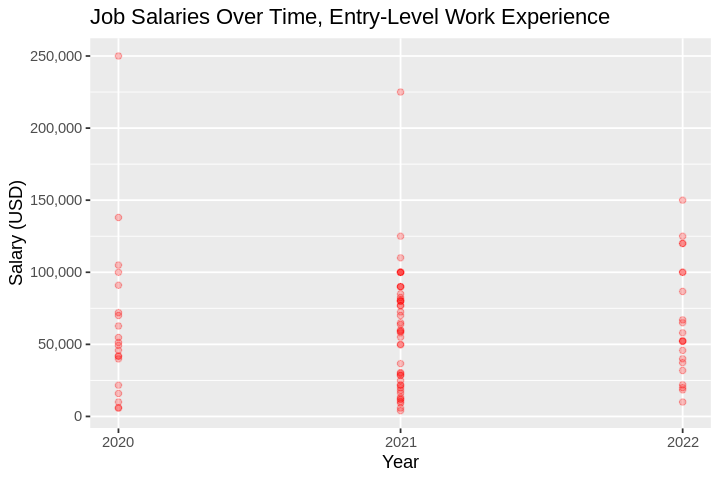

In [12]:
# Filter data to only include entry-level work experience, then plot data onto scatter plot
entry_level_scatter <- salary_data %>%
    filter(experience_level == "EN") %>%
    ggplot(aes(x = work_year, y = salary_in_usd)) +
        geom_point(col = "red", alpha = 0.25) +
        scale_x_continuous(n.breaks = 3, minor_breaks = NULL) +
        scale_y_continuous(labels = comma) +
        labs(title = "Job Salaries Over Time, Entry-Level Work Experience",
             x = "Year", y = "Salary (USD)")

# Display scatter plot
entry_level_scatter

Here is the plot for mid-level work experience:

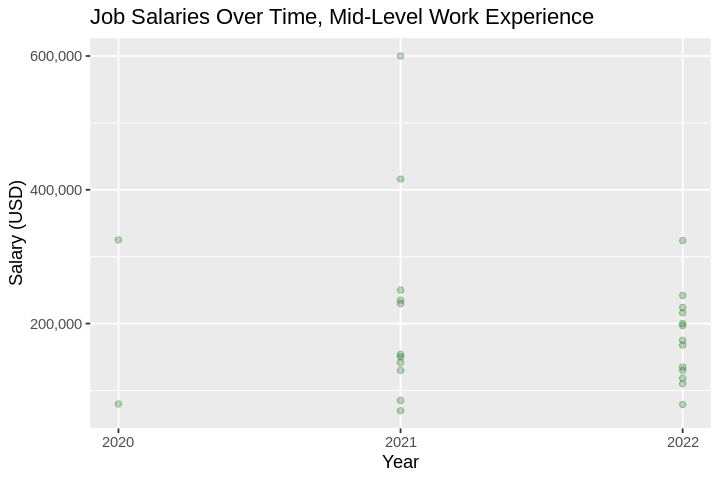

In [13]:
# Filter data to only include mid-level work experience, then plot data onto scatter plot
mid_level_scatter <- salary_data %>%
    filter(experience_level == "MI") %>%
    ggplot(aes(x = work_year, y = salary_in_usd)) +
        geom_point(col = "dark green", alpha = 0.25) +
        scale_x_continuous(n.breaks = 3, minor_breaks = NULL) +
        scale_y_continuous(labels = comma) +
        labs(title = "Job Salaries Over Time, Mid-Level Work Experience",
             x = "Year", y = "Salary (USD)")

# Display scatter plot
mid_level_scatter

Here is the plot for senior-level work experience:

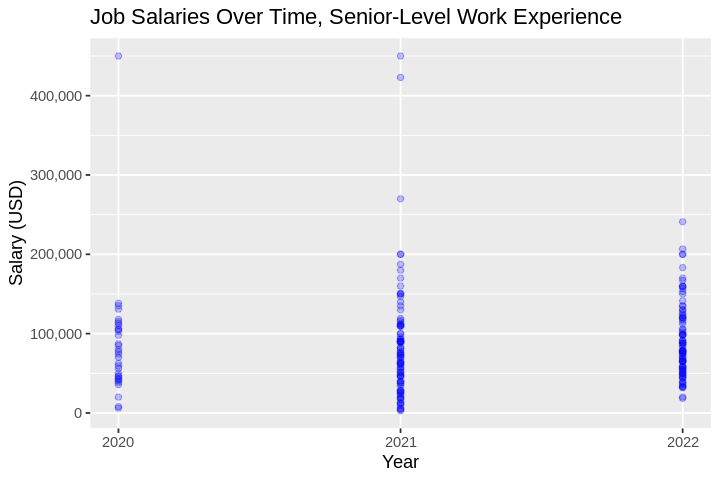

In [14]:
# Filter data to only include senior-level work experience, then plot data onto scatter plot
senior_level_scatter <- salary_data %>%
    filter(experience_level == "SE") %>%
    ggplot(aes(x = work_year, y = salary_in_usd)) +
        geom_point(col = "blue", alpha = 0.25) +
        scale_x_continuous(n.breaks = 3, minor_breaks = NULL) +
        scale_y_continuous(labels = comma) +
        labs(title = "Job Salaries Over Time, Senior-Level Work Experience",
             x = "Year", y = "Salary (USD)")

# Display scatter plot
senior_level_scatter

Here is the plot for executive-level work experience:

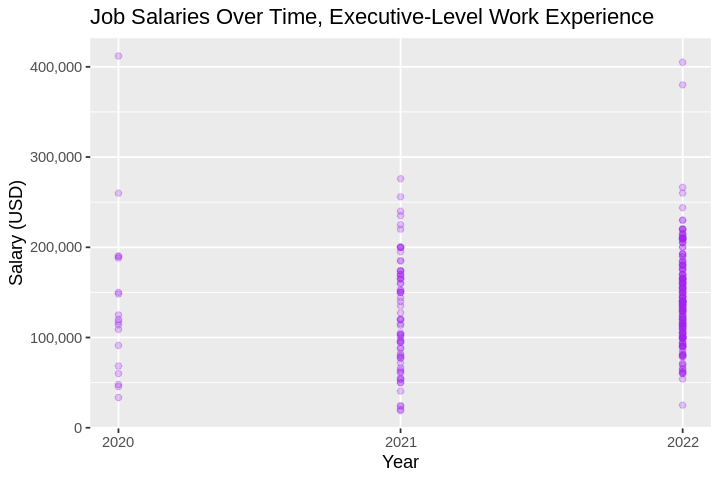

In [15]:
# Filter data to only include executive-level work experience, then plot data onto scatter plot
exec_level_scatter <- salary_data %>%
    filter(experience_level == "EX") %>%
    ggplot(aes(x = work_year, y = salary_in_usd)) +
        geom_point(col = "purple", alpha = 0.25) +
        scale_x_continuous(n.breaks = 3, minor_breaks = NULL) +
        scale_y_continuous(labels = comma) +
        labs(title = "Job Salaries Over Time, Executive-Level Work Experience",
             x = "Year", y = "Salary (USD)")

# Display scatter plot
exec_level_scatter

Here are all of the plots in a grid for comparison:

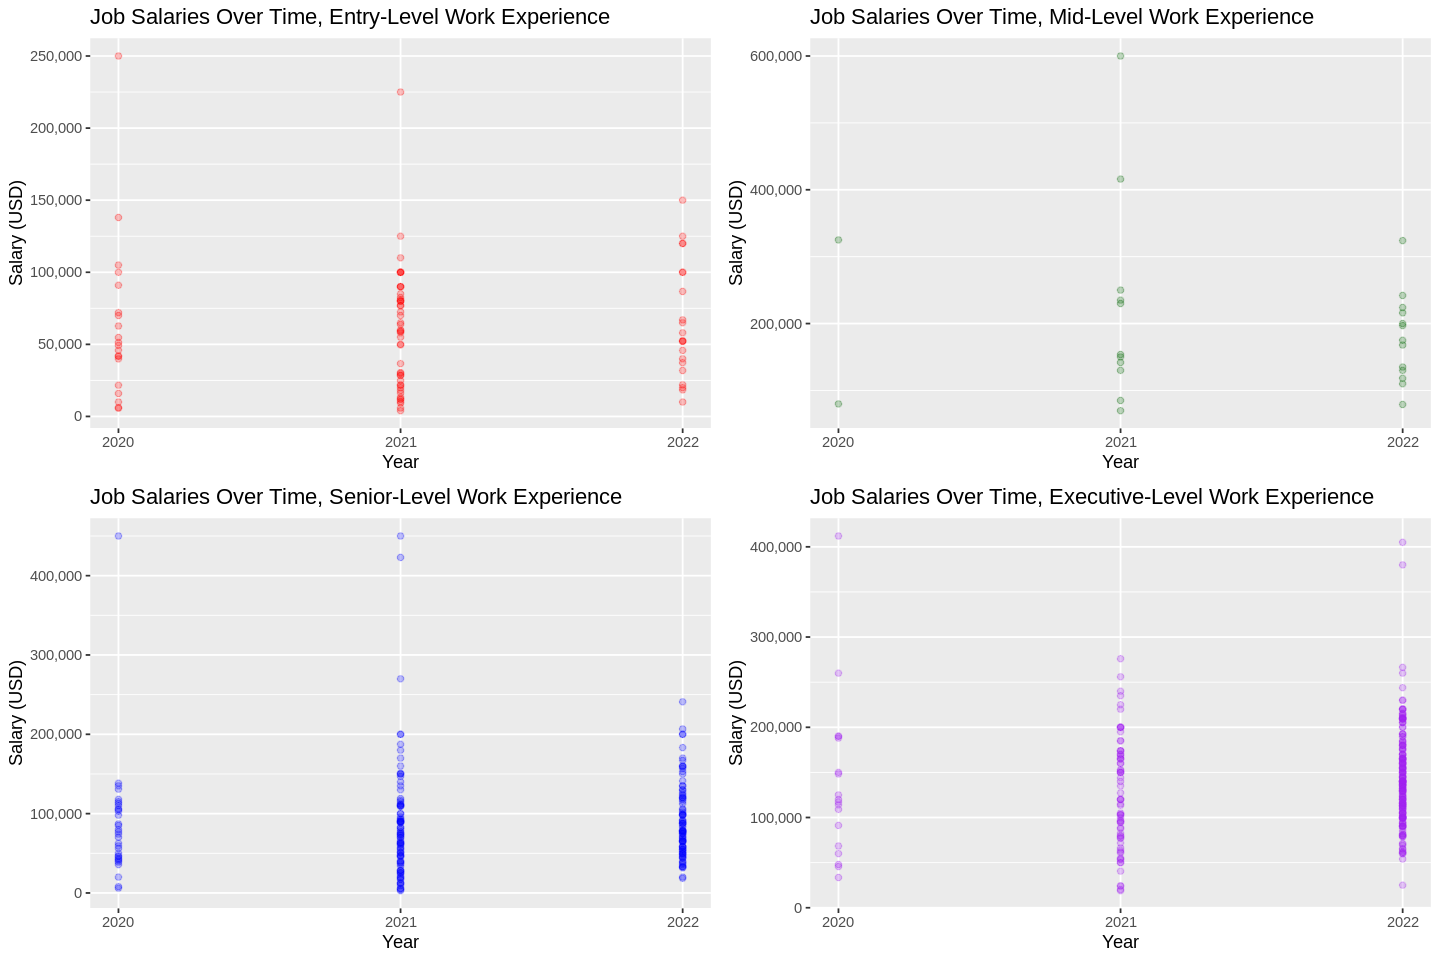

In [16]:
options(repr.plot.width = 12, repr.plot.height = 8)
grid.arrange(entry_level_scatter, mid_level_scatter,
             senior_level_scatter, exec_level_scatter,
             ncol = 2)

Observations from the graphs:
- There is not much data from the mid level of work experience to use, which could make analysis and conclusions less precise for that level. On the other hand, the senior level and executive level seem to have plenty of data, as the points are denser.
- The ranges that most salaries fall into at each work experience level are different; at the senior level, there also seem to be changes to the ranges every year!
- At the entry, mid, and senior levels of work experience, the average salary seems to remain relatively constant. However, at the executive level, the average seems to be increasing slowly by about \\$25,000 per year.
- At the entry level of work experience, the salaries seem to be denser around two values instead of one in 2020 and 2021.
- At the senior level of work experience, the salaries seem to be skewed upwards/positively in 2021 and 2022.